In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [538]:
df = pd.read_excel('F:\BackUpData\Project1\Participants_Data_Used_Cars\Data_Test.xlsx')

In [539]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.2,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.3,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.8,7.0,25.27
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364.0,null,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197.0,82.85,5.0,NaN


In [540]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null float64
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 115.8+ KB


In [541]:
name_list=[]
for i in df.Name:
    temp=i.split()
    name_list.append(temp[0])
df['Make']=name_list

In [542]:
df['Make'].value_counts()

Maruti           233
Hyundai          233
Honda            135
Toyota            96
Mercedes-Benz     62
Volkswagen        59
Mahindra          59
Ford              51
Audi              49
BMW               45
Tata              42
Chevrolet         30
Skoda             29
Nissan            26
Renault           25
Fiat              10
Mitsubishi         9
Jaguar             8
Land               7
Volvo              7
Mini               5
Jeep               4
Datsun             4
Bentley            1
Hindustan          1
OpelCorsa          1
Porsche            1
ISUZU              1
Isuzu              1
Name: Make, dtype: int64

In [543]:
df['Location'].value_counts()

Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64

In [544]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
Make                    0
dtype: int64

In [545]:
fuelmap={'CNG':'Clean','LPG':'Clean','Petrol':'Fossil','Diesel':'Fossil','Electric':'Clean'}
df['Fuel_Type']=df['Fuel_Type'].map(fuelmap)

In [546]:
df['Mileage'].replace(np.nan,0,inplace=True)
mileage_arr=[]
for i in df['Mileage']:
    if(i!=0):
        if('kmpl' in str(i)):
            temp=i.split()
            j=int(float(temp[0])*2.35)
            mileage_arr.append(j)
        elif('km/kg' in str(i)):
            temp=i.split()
            nj=float(temp[0])*1
            mileage_arr.append(nj)
    else:
        mileage_arr.append(i)


In [547]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Engine         10
Power          10
Seats          11
New_Price    1052
dtype: int64

In [548]:
df['Mileage']=mileage_arr

In [549]:
df['New_Price'].replace(np.nan,0,inplace=True)
df['Engine'].replace(np.nan,0,inplace=True)
#df['Power'].replace(np.nan,0,inplace=True)

In [550]:
name_list=df['Name']
name_list=name_list.tolist()

In [551]:
df_make=df.groupby('Make').mean()['Engine']
df_make_dict=df_make.to_dict()
index=0
for i in df['Engine']:
    #print(df['Make'][index])
    if(i==0):
        i=df_make_dict[df['Make'][index]]
    index=index+1

In [552]:
df_make=df.groupby('Make').mean()
df_make

,Year,Kilometers_Driven,Mileage,Engine,Seats,New_Price
Make,,,,,,
Audi,2013.673469,60948.183673,37.612245,2070.591837,5.040816,5.393878
BMW,2013.333333,55810.088889,39.311111,2270.000000,4.906977,10.656889
Bentley,2008.000000,31200.000000,23.000000,5998.000000,5.000000,375.000000
Chevrolet,2011.400000,67337.800000,41.566667,1395.333333,5.533333,0.000000
Datsun,2016.000000,30250.000000,47.750000,1098.250000,5.500000,5.490000
Fiat,2013.300000,53190.200000,40.500000,1163.600000,4.888889,2.651000
Ford,2012.980392,58744.078431,43.098039,1501.058824,5.156863,0.795882
Hindustan,1996.000000,65000.000000,33.000000,1995.000000,5.000000,0.000000
Honda,2013.148148,56661.940741,43.429630,1506.488889,5.194030,1.290889


In [553]:
df['Power'].replace(np.nan,0,inplace=True)

In [554]:
df['Power'].replace('null ',0,inplace=True)

In [555]:
df['Power']=df['Power'].astype('float')

In [556]:
df_make=df.groupby('Make').mean()['Power']
df_make_dict=df_make.to_dict()
index=0
for i in df['Power']:
    #print(df['Make'][index])
    if(i==0):
        i=df_make_dict[df['Make'][index]]
    index=index+1

In [557]:
df['Seats'].replace(np.nan,0,inplace=True)
df_make=df.groupby('Make').mean()['Seats']
df_make_dict=df_make.to_dict()
index=0
for i in df['Seats']:
    #print(df['Make'][index])
    if(i==0):
        i=int(df_make_dict[df['Make'][index]])
    index=index+1

In [558]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Make
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,Clean,Manual,First,32.26,998.0,58.20,4.0,0.00,Maruti
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Fossil,Manual,Second,58.00,796.0,47.30,5.0,0.00,Maruti
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Fossil,Manual,First,32.00,2393.0,147.80,7.0,25.27,Toyota
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Fossil,Manual,First,55.00,1364.0,0.00,5.0,0.00,Toyota
4,Hyundai i20 Magna,Mumbai,2014,29000,Fossil,Manual,First,43.00,1197.0,82.85,5.0,0.00,Hyundai


In [559]:
df_cleaned=df.drop(['Name','Make'],axis=1)

In [560]:
df_cleaned.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Delhi,2014,40929,Clean,Manual,First,32.26,998.0,58.20,4.0,0.00
1,Coimbatore,2013,54493,Fossil,Manual,Second,58.00,796.0,47.30,5.0,0.00
2,Mumbai,2017,34000,Fossil,Manual,First,32.00,2393.0,147.80,7.0,25.27
3,Hyderabad,2012,139000,Fossil,Manual,First,55.00,1364.0,0.00,5.0,0.00
4,Mumbai,2014,29000,Fossil,Manual,First,43.00,1197.0,82.85,5.0,0.00


In [561]:
df_cleaned=pd.get_dummies(df_cleaned)

In [527]:
X=df_cleaned.drop('Price',axis=1)

In [528]:
y=df_cleaned['Price']

In [529]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

F:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Softwares\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [530]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.3, random_state=1)

In [531]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [590]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.422067762960466
RMSE value for k=  2 is: 5.066731469885603
RMSE value for k=  3 is: 4.995671161676355
RMSE value for k=  4 is: 4.95951334847024
RMSE value for k=  5 is: 4.9600562507973835
RMSE value for k=  6 is: 5.024595544279945
RMSE value for k=  7 is: 5.00714295948947
RMSE value for k=  8 is: 5.0805241272427635
RMSE value for k=  9 is: 5.192540948447654
RMSE value for k=  10 is: 5.235268936421089


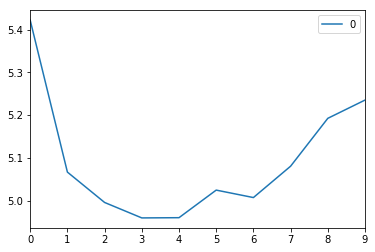

In [591]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [584]:
df_cleaned.shape

(1234, 26)

In [585]:
X_train.shape

(4213, 26)

In [586]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Clean', 'Fuel_Type_Fossil', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [587]:
df_cleaned.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Clean', 'Fuel_Type_Fossil', 'Transmission_Automatic',
       'Transmission_Manual', 'Owner_Type_First', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [567]:
df_cleaned.shape

(1234, 26)

In [502]:
X.shape

(6019, 57)

In [592]:
pred=model.predict(df_cleaned)

In [566]:
X_train.shape

(4213, 26)

In [570]:
df_new=pd.DataFrame({'Result':pred})

In [572]:
df_new.to_csv('Result_New.csv')

In [593]:
pred

array([6.035, 6.035, 6.035, ..., 6.035, 6.035, 6.035])

In [589]:
y_test

2319    78.80
3652     3.51
2397     6.00
3536    10.28
4400     2.35
5347     3.35
2852    16.25
4894     8.40
1897     4.00
3663     4.50
3929    12.50
820      1.79
2140     8.10
1953    13.35
662      4.65
4502    47.50
5569     3.00
3782     9.11
234      2.50
2237     5.99
161     10.90
5935     3.10
3076    12.50
5633     4.50
5469     2.40
3913     1.89
4706    19.50
368      2.90
285      3.57
4808     4.50
        ...  
2652    35.00
4499    12.99
2610     4.92
919      8.65
4604     3.15
4716     5.00
2800     3.10
955      3.65
1833     2.50
4119     3.41
5987     5.11
5073    21.95
306     20.26
1548    29.98
1736     3.30
1249     4.50
2796     9.00
4916     6.75
1913    20.12
2377     3.90
2712     3.42
1731     2.10
553      6.50
3160     2.45
2618     1.50
4865     5.77
3194    24.77
1253     2.00
1041     4.57
1697     3.25
Name: Price, Length: 1806, dtype: float64